In [1]:
import os 
import pandas as pd

In [2]:
# Util functions to load a UCR dataset
def load(csv_path):
    df = pd.read_csv(csv_path)
    df.columns = ['label'] + ['t%s' % i for i in range(len(df.columns) - 1)]
    return df

def get_dataset_names(datasets_dir):
    dataset_names = []
    for root, dirs, files in os.walk(datasets_dir):
        for name in dirs:
            if name[0] != '.': # ignore cached files
                dataset_names.append(name)
    return dataset_names

In [3]:
# Unroll data and save it to CSV. 0-based labels
def convert(df, max_rows):
    values = []
    labels = []
    label_names = list(df.label.unique())
    for _, row in df.iterrows():
        label_id = label_names.index(row.label)
        for value in row.values[1:]:
            values.append(value)
            labels.append(label_id)

    assert len(values) == (len(df.columns) - 1) * len(df)
    converted_df = pd.DataFrame({'scalar': values, 'label': labels})
    if max_rows is not None:
        converted_df = converted_df[:max_rows]

    return label_names, converted_df

# UCR data `synthetic_control`

In [13]:
phases = ['train','test']
max_output_rows = None
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for phase in phases:
    datasets_dir = "UCR_TS_Archive_2015"
    dataset_name = 'synthetic_control'
    input_csv_path = os.path.join(datasets_dir, dataset_name, '%s_%s' % (dataset_name, phase.upper()))
    df = load(input_csv_path)
    print 'csv loaded:', input_csv_path

    # Convert it and save it
    label_names, df_converted = convert(df, max_output_rows)
    print 'dataset size:', len(df_converted)
    print 'label names:', label_names
    
    output_csv_path = '%s/%s_%s.csv' % (output_dir, dataset_name, phase.lower())
    df_converted.to_csv(output_csv_path)
    print 'csv saved:', output_csv_path

csv loaded: UCR_TS_Archive_2015/synthetic_control/synthetic_control_TRAIN
dataset size: 17940
label names: [1, 2, 3, 4, 5, 6]
csv saved: data/synthetic_control_train.csv
csv loaded: UCR_TS_Archive_2015/synthetic_control/synthetic_control_TEST
dataset size: 17940
label names: [1, 2, 3, 4, 5, 6]
csv saved: data/synthetic_control_test.csv


In [14]:
# run HTM on UCR data
%run ../capybara/htm/htm_network_runner.py --config config.htm.yml 

INFO:NetworkRunner:Data: synthetic_control_train.csv
INFO:NetworkRunner:Wrote to file (t=1000, label=0)
INFO:NetworkRunner:Elapsed time: 1.75s
INFO:NetworkRunner:Wrote to file (t=2000, label=0)
INFO:NetworkRunner:Elapsed time: 4.02s
INFO:NetworkRunner:Wrote to file (t=3000, label=1)
INFO:NetworkRunner:Elapsed time: 6.42s
INFO:NetworkRunner:Wrote to file (t=4000, label=1)
INFO:NetworkRunner:Elapsed time: 8.90s
INFO:NetworkRunner:Wrote to file (t=5000, label=1)
INFO:NetworkRunner:Elapsed time: 11.38s
INFO:NetworkRunner:Wrote to file (t=6000, label=2)
INFO:NetworkRunner:Elapsed time: 14.27s
INFO:NetworkRunner:Wrote to file (t=7000, label=2)
INFO:NetworkRunner:Elapsed time: 17.35s
INFO:NetworkRunner:Wrote to file (t=8000, label=2)
INFO:NetworkRunner:Elapsed time: 20.70s
INFO:NetworkRunner:Wrote to file (t=9000, label=3)
INFO:NetworkRunner:Elapsed time: 24.30s
INFO:NetworkRunner:Wrote to file (t=10000, label=3)
INFO:NetworkRunner:Elapsed time: 28.17s
INFO:NetworkRunner:Wrote to file (t=1100

In [34]:
# run baseline on HTM traces with just the SP
%run ../capybara/baseline/baseline_runner.py --config config.baseline.ucr.sp.yml 

input_dim 2048
output_dim 6
train True

Epoch 0/10
-> Elapsed train time: 1s - Rows processed: 2048
-> Elapsed train time: 3s - Rows processed: 4096
-> Elapsed train time: 4s - Rows processed: 6144
-> Elapsed train time: 6s - Rows processed: 8192
-> Elapsed train time: 7s - Rows processed: 10240
-> Elapsed train time: 9s - Rows processed: 12288
-> Elapsed train time: 10s - Rows processed: 14336
-> Elapsed train time: 11s - Rows processed: 16384
-> Elapsed train time: 12s - Rows processed: 18432
Epoch 1/10
-> Elapsed train time: 14s - Rows processed: 2048
-> Elapsed train time: 15s - Rows processed: 4096
-> Elapsed train time: 17s - Rows processed: 6144
-> Elapsed train time: 18s - Rows processed: 8192
-> Elapsed train time: 19s - Rows processed: 10240
-> Elapsed train time: 21s - Rows processed: 12288
-> Elapsed train time: 22s - Rows processed: 14336
-> Elapsed train time: 23s - Rows processed: 16384
-> Elapsed train time: 25s - Rows processed: 18432
Epoch 2/10
-> Elapsed train time: 

Plot saved: plots_ucr_sp/train_history.html
Accuracy on test set: 0.167224080268
Plot saved: plots_ucr_sp/confusion_matrix.png
Plot saved: plots_ucr_sp/classification_report.png
Plot saved: plots_ucr_sp/predictions.html


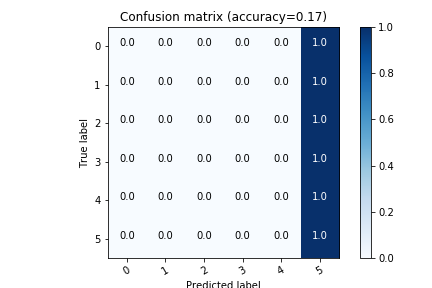

In [35]:
# plot baseline results
%run ../capybara/baseline/plot_results.py -v=11 -i='results_ucr_sp' -o='plots_ucr_sp'
from IPython.display import Image, HTML
Image(filename='plots_ucr_sp/confusion_matrix.png') 

In [39]:
# run baseline on HTM traces with SP + TM
%run ../capybara/baseline/baseline_runner.py --config config.baseline.ucr.tm.yml 

input_dim 65536
output_dim 6
train True

Epoch 0/10
-> Elapsed train time: 9s - Rows processed: 2048
-> Elapsed train time: 18s - Rows processed: 4096
-> Elapsed train time: 28s - Rows processed: 6144
-> Elapsed train time: 37s - Rows processed: 8192
-> Elapsed train time: 45s - Rows processed: 10240
-> Elapsed train time: 54s - Rows processed: 12288
-> Elapsed train time: 63s - Rows processed: 14336
-> Elapsed train time: 70s - Rows processed: 16384
-> Elapsed train time: 76s - Rows processed: 18432
Epoch 1/10
-> Elapsed train time: 84s - Rows processed: 2048
-> Elapsed train time: 92s - Rows processed: 4096
-> Elapsed train time: 101s - Rows processed: 6144
-> Elapsed train time: 110s - Rows processed: 8192
-> Elapsed train time: 118s - Rows processed: 10240
-> Elapsed train time: 127s - Rows processed: 12288
-> Elapsed train time: 134s - Rows processed: 14336
-> Elapsed train time: 142s - Rows processed: 16384
-> Elapsed train time: 148s - Rows processed: 18432
Epoch 2/10
-> Elapsed

Plot saved: plots_ucr_tm/train_history.html
Accuracy on test set: 0.167224080268
Plot saved: plots_ucr_tm/confusion_matrix.png
Plot saved: plots_ucr_tm/classification_report.png
Plot saved: plots_ucr_tm/predictions.html


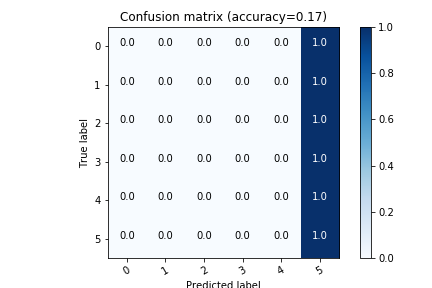

In [40]:
# plot baseline results
%run ../capybara/baseline/plot_results.py -v=11 -i='results_ucr_tm' -o='plots_ucr_tm'
from IPython.display import Image, HTML
Image(filename='plots_ucr_tm/confusion_matrix.png') 

# Motifs dataset

In [50]:
# Load and convert motifs dataset
phases = ['train','test']
max_output_rows = None
output_dir = 'data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for phase in phases:
    datasets_dir = "SyntheticData"
    dataset_name = 'Test1'
    input_csv_path = os.path.join(datasets_dir, dataset_name, '%s_%s' % (dataset_name, phase.upper()))
    df = load(input_csv_path)
    print 'csv loaded:', input_csv_path

    # Convert it and save it
    label_names, df_converted = convert(df, max_output_rows)
    print 'dataset size:', len(df_converted)
    print 'label names:', label_names
    
    output_csv_path = '%s/%s_%s.csv' % (output_dir, dataset_name.lower(), phase.lower())
    df_converted.to_csv(output_csv_path)
    print 'csv saved:', output_csv_path

csv loaded: SyntheticData/Test1/Test1_TRAIN
dataset size: 19900
label names: [0.0, 1.0]
csv saved: data/test1_train.csv
csv loaded: SyntheticData/Test1/Test1_TEST
dataset size: 19900
label names: [0.0, 1.0]
csv saved: data/test1_test.csv


In [52]:
# Run HTM on motifs dataset
%run ../capybara/htm/htm_network_runner.py --config config.htm.motifs.yml 

INFO:NetworkRunner:Data: test1_train.csv
INFO:NetworkRunner:Wrote to file (t=1000, label=0)
INFO:NetworkRunner:Elapsed time: 1.55s
INFO:NetworkRunner:Wrote to file (t=2000, label=0)
INFO:NetworkRunner:Elapsed time: 3.37s
INFO:NetworkRunner:Wrote to file (t=3000, label=0)
INFO:NetworkRunner:Elapsed time: 5.32s
INFO:NetworkRunner:Wrote to file (t=4000, label=0)
INFO:NetworkRunner:Elapsed time: 7.34s
INFO:NetworkRunner:Wrote to file (t=5000, label=0)
INFO:NetworkRunner:Elapsed time: 9.42s
INFO:NetworkRunner:Wrote to file (t=6000, label=0)
INFO:NetworkRunner:Elapsed time: 11.51s
INFO:NetworkRunner:Wrote to file (t=7000, label=0)
INFO:NetworkRunner:Elapsed time: 13.72s
INFO:NetworkRunner:Wrote to file (t=8000, label=0)
INFO:NetworkRunner:Elapsed time: 16.07s
INFO:NetworkRunner:Wrote to file (t=9000, label=0)
INFO:NetworkRunner:Elapsed time: 18.54s
INFO:NetworkRunner:Wrote to file (t=10000, label=1)
INFO:NetworkRunner:Elapsed time: 21.16s
INFO:NetworkRunner:Wrote to file (t=11000, label=1)
I

In [53]:
# run baseline on HTM traces with just the SP
%run ../capybara/baseline/baseline_runner.py --config config.baseline.motifs.sp.yml 

input_dim 2048
output_dim 6
train True

Epoch 0/10
-> Elapsed train time: 1s - Rows processed: 2048
-> Elapsed train time: 3s - Rows processed: 4096
-> Elapsed train time: 4s - Rows processed: 6144
-> Elapsed train time: 5s - Rows processed: 8192
-> Elapsed train time: 6s - Rows processed: 10240
-> Elapsed train time: 8s - Rows processed: 12288
-> Elapsed train time: 9s - Rows processed: 14336
-> Elapsed train time: 10s - Rows processed: 16384
-> Elapsed train time: 11s - Rows processed: 18432
-> Elapsed train time: 12s - Rows processed: 20480
Epoch 1/10
-> Elapsed train time: 13s - Rows processed: 2048
-> Elapsed train time: 15s - Rows processed: 4096
-> Elapsed train time: 16s - Rows processed: 6144
-> Elapsed train time: 17s - Rows processed: 8192
-> Elapsed train time: 18s - Rows processed: 10240
-> Elapsed train time: 20s - Rows processed: 12288
-> Elapsed train time: 21s - Rows processed: 14336
-> Elapsed train time: 22s - Rows processed: 16384
-> Elapsed train time: 23s - Rows p

Plot saved: plots_motifs_sp/train_history.html
Accuracy on test set: 0.502512562814
Plot saved: plots_motifs_sp/confusion_matrix.png
Plot saved: plots_motifs_sp/classification_report.png
Plot saved: plots_motifs_sp/predictions.html


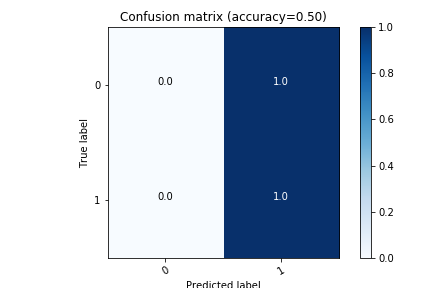

In [56]:
# plot baseline results
%run ../capybara/baseline/plot_results.py -v=11 -i='results_motifs_sp' -o='plots_motifs_sp'
from IPython.display import Image, HTML
Image(filename='plots_motifs_sp/confusion_matrix.png') 

In [54]:
# run baseline on HTM traces with SP + TM
%run ../capybara/baseline/baseline_runner.py --config config.baseline.motifs.tm.yml 

input_dim 65536
output_dim 6
train True

Epoch 0/10
-> Elapsed train time: 6s - Rows processed: 2048
-> Elapsed train time: 13s - Rows processed: 4096
-> Elapsed train time: 19s - Rows processed: 6144
-> Elapsed train time: 25s - Rows processed: 8192
-> Elapsed train time: 31s - Rows processed: 10240
-> Elapsed train time: 37s - Rows processed: 12288
-> Elapsed train time: 43s - Rows processed: 14336
-> Elapsed train time: 49s - Rows processed: 16384
-> Elapsed train time: 55s - Rows processed: 18432
-> Elapsed train time: 59s - Rows processed: 20480
Epoch 1/10
-> Elapsed train time: 66s - Rows processed: 2048
-> Elapsed train time: 71s - Rows processed: 4096
-> Elapsed train time: 78s - Rows processed: 6144
-> Elapsed train time: 84s - Rows processed: 8192
-> Elapsed train time: 90s - Rows processed: 10240
-> Elapsed train time: 96s - Rows processed: 12288
-> Elapsed train time: 102s - Rows processed: 14336
-> Elapsed train time: 108s - Rows processed: 16384
-> Elapsed train time: 114

Plot saved: plots_motifs_tm/train_history.html
Accuracy on test set: 0.502512562814
Plot saved: plots_motifs_tm/confusion_matrix.png
Plot saved: plots_motifs_tm/classification_report.png
Plot saved: plots_motifs_tm/predictions.html


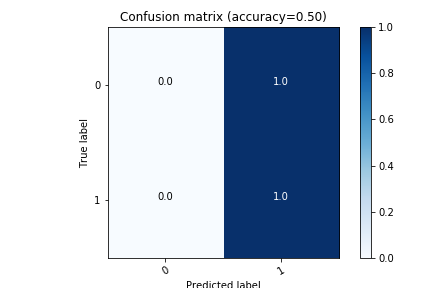

In [55]:
# plot baseline results
%run ../capybara/baseline/plot_results.py -v=11 -i='results_motifs_tm' -o='plots_motifs_tm'
from IPython.display import Image, HTML
Image(filename='plots_motifs_tm/confusion_matrix.png') 